In [85]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV


# Load data
train_df = pd.read_csv("C:\\Users\\camil\\Documents\\Datascience IA\\Docs\\DataIA\\titanic\\train.csv")
test_df = pd.read_csv("C:\\Users\\camil\\Documents\\Datascience IA\\Docs\\DataIA\\titanic\\test.csv")

In [86]:
# Exploratory Data Analysis
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [87]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [88]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


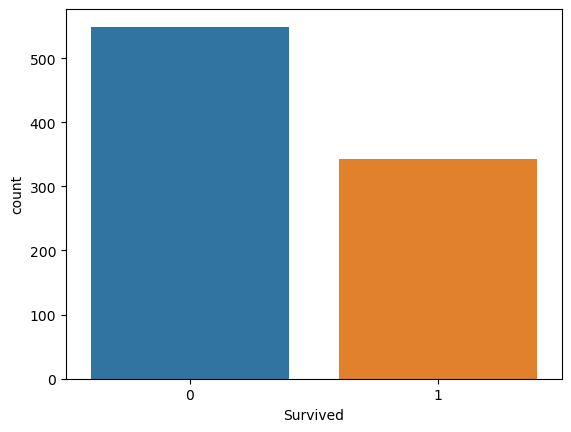

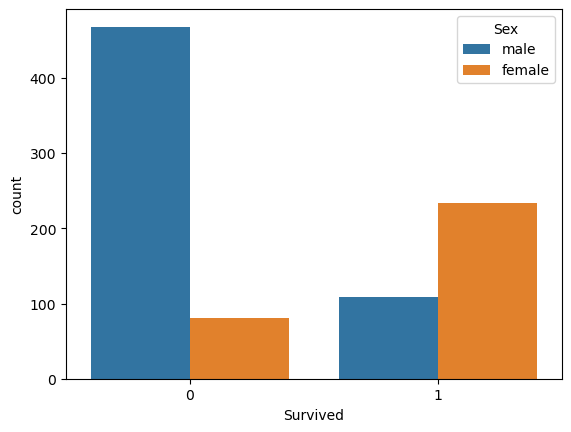

In [89]:
sns.countplot(x='Survived', data=train_df)
plt.show()

sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.show()

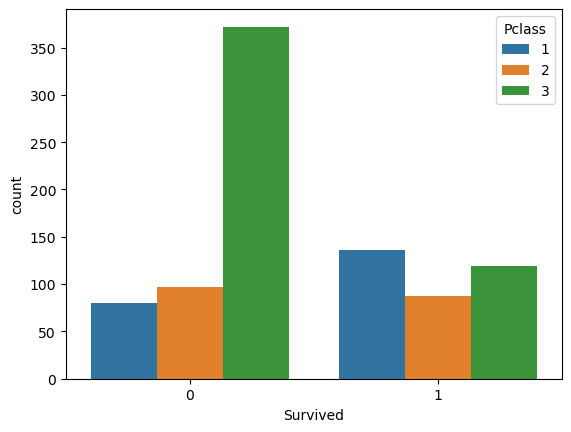

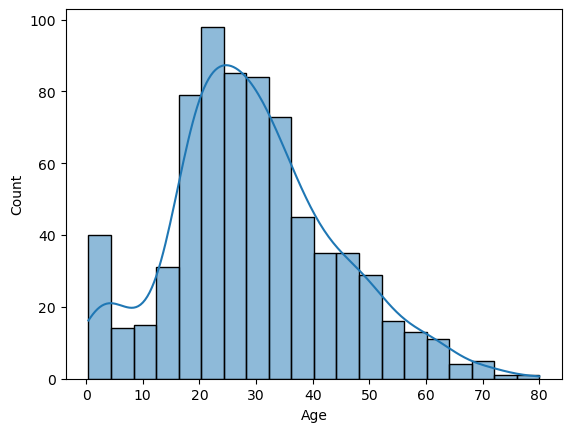

In [90]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.show()

sns.histplot(train_df['Age'].dropna(), kde=True)
plt.show()

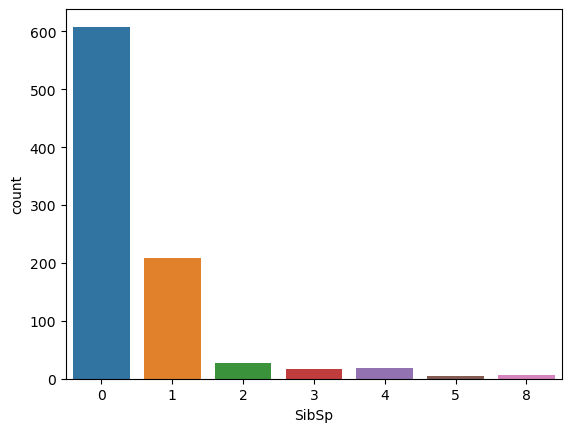

In [91]:
sns.countplot(x='SibSp', data=train_df)
plt.show()

In [92]:
# Data cleaning

# Drop unnecessary columns
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values in Age column with mean value
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

# Fill missing values in Embarked column with mode value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Fill missing values in Fare column with mean value
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

# Encode categorical column Sex as 0/1
train_df['Sex'] = pd.get_dummies(train_df['Sex'], drop_first=True)
test_df['Sex'] = pd.get_dummies(test_df['Sex'], drop_first=True)

# One-hot encode categorical column Embarked
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)


In [93]:
# Split data into train, validation and test sets
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_test = test_df

In [94]:
# Build the model
logreg = LogisticRegression(max_iter=10000)

In [95]:
# Set hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Fit GridSearchCV object to training data
grid_search.fit(X_train, y_train)

# Get best parameters from GridSearchCV
best_params = grid_search.best_params_

# Create LogisticRegression object with best parameters
logreg = LogisticRegression(max_iter=10000, C=best_params['C'], penalty=best_params['penalty'])

# Fit LogisticRegression object to training data with best parameters
logreg.fit(X_train, y_train)


LogisticRegression(C=0.1, max_iter=10000)

In [96]:
# Evaluate the model
# Make predictions on the validation set and print the performance metrics
y_val_pred = logreg.predict(X_val)
print('Validation Set Performance:')
print('Accuracy:', accuracy_score(y_val, y_val_pred))
print('Precision:', precision_score(y_val, y_val_pred))
print('Recall:', recall_score(y_val, y_val_pred))
print('F1 Score:', f1_score(y_val, y_val_pred))
print('ROC-AUC Score:', roc_auc_score(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = logreg.predict(X_test)


Validation Set Performance:
Accuracy: 0.8208955223880597
Precision: 0.8315789473684211
Recall: 0.7117117117117117
F1 Score: 0.7669902912621359
ROC-AUC Score: 0.8049004418431169


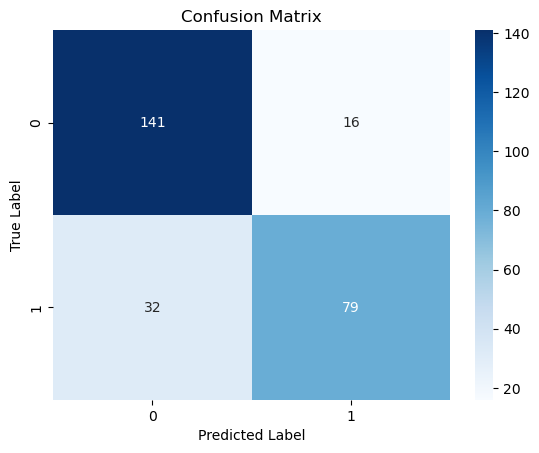

In [97]:
# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

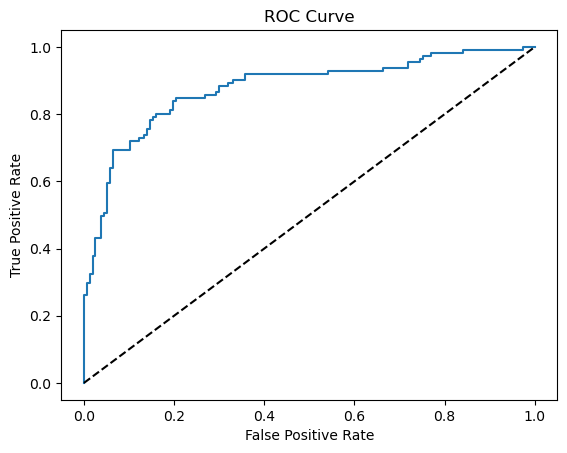

In [98]:
# ROC curve
y_val_pred_proba = logreg.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [81]:
# Save the model
joblib.dump(logreg, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [82]:
# Save the predictions to a new CSV file

# Create a new submission DataFrame with PassengerId and predicted Survived values
submission_df = pd.DataFrame({'PassengerId': test_df.index + 1, 'Survived': y_test_pred})

# Save the predictions to a new CSV file
submission_df.to_csv('submission.csv', index=False)